# Искусственные нейронные сети

Считываем набор данных цифр MNIST.

In [102]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [103]:
digits = load_digits()

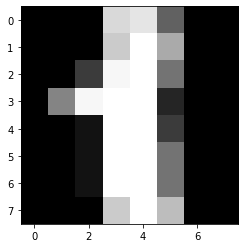

In [104]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [105]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [5]:
from sklearn.neural_network import MLPClassifier

In [60]:
model = MLPClassifier((64, 64), activation='tanh')

In [46]:
train_y

array([3, 4, 5, ..., 8, 8, 6])

In [61]:
model.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
y_hat = model.predict(test_x)

In [48]:
y_hat

array([6, 1, 7, 9, 2, 6, 2, 2, 5, 0, 4, 5, 1, 5, 2, 4, 5, 5, 3, 7, 7, 2,
       4, 5, 8, 2, 8, 1, 8, 5, 8, 0, 7, 4, 0, 5, 5, 7, 0, 1, 6, 2, 8, 8,
       5, 8, 1, 4, 4, 7, 4, 1, 6, 3, 0, 5, 2, 5, 2, 6, 0, 6, 1, 7, 6, 4,
       2, 5, 1, 3, 0, 7, 5, 4, 0, 6, 1, 3, 5, 2, 4, 6, 1, 8, 1, 2, 7, 9,
       1, 2, 1, 8, 4, 4, 3, 0, 6, 3, 7, 2, 0, 6, 0, 2, 5, 7, 8, 7, 8, 2,
       5, 9, 7, 1, 0, 4, 2, 2, 0, 1, 5, 8, 7, 7, 7, 4, 0, 4, 1, 5, 4, 1,
       1, 3, 3, 9, 2, 8, 1, 2, 4, 7, 6, 2, 9, 3, 4, 2, 2, 9, 1, 5, 2, 0,
       9, 9, 5, 8, 2, 7, 2, 0, 6, 1, 2, 6, 8, 6, 4, 9, 0, 4, 9, 0, 1, 9,
       5, 7, 0, 0, 9, 1, 1, 0, 1, 0, 0, 6, 5, 9, 6, 2, 8, 5, 0, 9, 1, 9,
       4, 5, 1, 2, 9, 6, 7, 6, 0, 9, 4, 6, 3, 1, 8, 4, 4, 0, 9, 5, 0, 9,
       7, 7, 1, 9, 6, 5, 8, 3, 6, 2, 2, 9, 7, 1, 1, 2, 2, 4, 1, 3, 5, 7,
       2, 4, 1, 3, 3, 5, 0, 6, 8, 9, 0, 6, 6, 2, 1, 8, 6, 6, 2, 1, 0, 6,
       4, 3, 0, 3, 8, 1, 4, 7, 4, 7, 6, 2, 1, 1, 9, 1, 1, 7, 3, 9, 6, 8,
       1, 6, 1, 0, 9, 5, 5, 8, 0, 2, 9, 4, 5, 7, 3,

In [54]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  2,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 32]])

In [11]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.93617021, 0.975     , 0.96      , 0.97142857,
        1.        , 1.        , 1.        , 0.93548387, 0.97058824]),
 array([1.        , 0.93617021, 1.        , 0.96      , 1.        ,
        1.        , 0.97297297, 0.97142857, 0.93548387, 0.97058824]),
 array([1.        , 0.93617021, 0.98734177, 0.96      , 0.98550725,
        1.        , 0.98630137, 0.98550725, 0.93548387, 0.97058824]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [63]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9777777777777777

Теперь попробуем сверточные и рекуррентные сети из Keras

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

Хорошо, сперва полносвязанная сеть.

In [90]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001), 
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )


In [91]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(10)
    y2[y] = 1
    train_y2.append(y2)
    
test_y2 = []
for y in test_y:
    y2 = np.zeros(10)
    y2[y] = 1
    test_y2.append(y2)
    
train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [92]:
train_y2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
model.fit(train_x, train_y2, epochs=200)

Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 3.1453 - accuracy: 0.1719
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 2.9835 - accuracy: 0.2700
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 2.8173 - accuracy: 0.3591
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 2.6519 - accuracy: 0.4426
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 2.4896 - accuracy: 0.5150
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 2.3386 - accuracy: 0.5637
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 2.2000 - accuracy: 0.5985
Epoch 8/200
45/45 [==============================] - 0s 2ms/step - loss: 2.0733 - accuracy: 0.6347
Epoch 9/200
45/45 [==============================] - 0s 2ms/step - loss: 1.9571 - accuracy: 0.6695
Epoch 10/200
45/45 [==============================] - 0s 2ms/step - loss: 1.8482 - accuracy: 0.7070
Epoch 11/

45/45 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.9805
Epoch 84/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.9805
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.9805
Epoch 86/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.9805
Epoch 87/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.9805
Epoch 88/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.9805
Epoch 89/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.9819
Epoch 90/200
45/45 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.9819
Epoch 91/200
45/45 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.9833
Epoch 92/200
45/45 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.9847
Epoch 93/200


45/45 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.9930
Epoch 165/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9930
Epoch 166/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9944
Epoch 167/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.9937
Epoch 168/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.9944
Epoch 169/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9944
Epoch 170/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.9944
Epoch 171/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9937
Epoch 172/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.9944
Epoch 173/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9944
Epoc

In [94]:
y_hat = model.predict(test_x)

In [95]:
y_hat

array([[2.0555593e-03, 5.0919270e-03, 1.0853286e-02, ..., 6.1834708e-04,
        7.3247286e-03, 4.3711427e-04],
       [5.6339538e-04, 8.8296276e-01, 4.3616828e-02, ..., 1.4114926e-04,
        2.5150940e-02, 3.4447883e-03],
       [6.2483677e-04, 4.1005493e-04, 6.4473849e-04, ..., 9.8478204e-01,
        5.1054796e-03, 5.7451660e-04],
       ...,
       [1.1959712e-02, 4.2389115e-04, 9.8940276e-04, ..., 2.4778629e-04,
        1.4394606e-02, 2.5717507e-04],
       [8.9180208e-04, 4.7305766e-03, 2.1395087e-03, ..., 9.6825445e-01,
        5.8698566e-03, 1.8421604e-03],
       [1.3102501e-02, 6.4121473e-01, 2.4279786e-02, ..., 3.4163009e-02,
        2.1646793e-01, 3.4930895e-03]], dtype=float32)

In [96]:
test_y

array([[6, 1, 7, 9, 2, 6, 2, 2, 5, 0, 4, 5, 1, 5, 2, 4, 5, 5, 3, 7, 7, 2,
        4, 5, 8, 2, 8, 1, 9, 5, 8, 0, 7, 4, 0, 5, 5, 7, 0, 1, 6, 2, 8, 8,
        5, 8, 1, 4, 4, 7, 4, 1, 6, 3, 0, 5, 2, 5, 2, 6, 0, 6, 1, 7, 6, 4,
        2, 5, 1, 3, 0, 7, 5, 4, 0, 6, 1, 3, 5, 2, 4, 6, 1, 8, 8, 2, 7, 9,
        1, 2, 1, 8, 4, 4, 3, 0, 6, 3, 7, 2, 0, 6, 0, 2, 5, 7, 8, 7, 8, 8,
        5, 9, 7, 1, 0, 9, 2, 2, 0, 1, 5, 8, 7, 7, 7, 4, 0, 4, 1, 5, 4, 1,
        1, 3, 3, 9, 2, 8, 1, 2, 4, 7, 6, 2, 9, 3, 4, 2, 2, 9, 1, 5, 2, 0,
        9, 9, 5, 8, 2, 7, 2, 0, 6, 1, 2, 6, 8, 6, 4, 9, 0, 4, 9, 0, 1, 9,
        5, 7, 0, 0, 9, 1, 1, 0, 1, 0, 0, 6, 5, 9, 6, 2, 8, 5, 0, 9, 1, 9,
        4, 5, 1, 2, 9, 6, 7, 6, 0, 9, 4, 6, 3, 1, 8, 4, 4, 0, 9, 5, 0, 9,
        7, 7, 1, 9, 6, 5, 8, 3, 6, 2, 2, 9, 7, 1, 1, 2, 2, 4, 1, 3, 5, 7,
        2, 4, 1, 3, 3, 5, 0, 6, 8, 9, 0, 6, 6, 2, 1, 8, 6, 6, 2, 1, 0, 6,
        4, 3, 0, 3, 8, 1, 4, 7, 4, 7, 6, 2, 1, 1, 9, 1, 1, 7, 3, 9, 6, 8,
        8, 6, 1, 0, 9, 5, 5, 8, 0, 2, 

In [97]:
y_hat = [np.argmax(y) for y in y_hat]

In [98]:
y_hat

[6,
 1,
 7,
 9,
 2,
 6,
 2,
 2,
 5,
 0,
 4,
 5,
 1,
 5,
 2,
 4,
 3,
 5,
 3,
 7,
 7,
 2,
 4,
 5,
 8,
 2,
 8,
 1,
 3,
 5,
 8,
 0,
 7,
 4,
 0,
 5,
 5,
 7,
 0,
 1,
 6,
 2,
 8,
 8,
 5,
 8,
 1,
 4,
 4,
 7,
 4,
 1,
 0,
 3,
 0,
 5,
 2,
 5,
 2,
 1,
 0,
 6,
 1,
 7,
 6,
 4,
 2,
 5,
 1,
 3,
 0,
 7,
 5,
 4,
 0,
 6,
 1,
 3,
 5,
 2,
 4,
 6,
 1,
 8,
 1,
 2,
 7,
 9,
 1,
 2,
 1,
 8,
 4,
 4,
 3,
 0,
 6,
 3,
 7,
 2,
 0,
 6,
 0,
 2,
 5,
 7,
 8,
 7,
 8,
 8,
 5,
 9,
 7,
 1,
 0,
 8,
 2,
 2,
 0,
 1,
 5,
 8,
 7,
 7,
 7,
 4,
 0,
 4,
 1,
 5,
 4,
 1,
 1,
 3,
 3,
 9,
 2,
 8,
 1,
 2,
 4,
 7,
 0,
 2,
 9,
 3,
 4,
 2,
 2,
 9,
 1,
 5,
 2,
 0,
 9,
 9,
 5,
 8,
 2,
 7,
 2,
 0,
 6,
 1,
 2,
 6,
 8,
 6,
 4,
 9,
 0,
 4,
 9,
 0,
 1,
 9,
 9,
 7,
 0,
 0,
 9,
 1,
 1,
 0,
 1,
 0,
 0,
 6,
 5,
 8,
 6,
 2,
 8,
 5,
 0,
 9,
 1,
 9,
 4,
 5,
 1,
 2,
 9,
 6,
 7,
 6,
 0,
 9,
 4,
 6,
 3,
 1,
 8,
 4,
 4,
 0,
 9,
 5,
 0,
 9,
 7,
 7,
 1,
 9,
 6,
 5,
 8,
 3,
 6,
 2,
 2,
 9,
 7,
 1,
 1,
 2,
 2,
 4,
 1,
 3,
 5,
 7,
 2,
 4,
 1,
 3,
 3,
 5,
 0,
 6,


In [99]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 34,  0,  0,  0,  1],
       [ 2,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 31]])

In [100]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.95454545, 0.92156863, 1.        , 0.92592593, 1.        ,
        0.97142857, 1.        , 1.        , 0.93103448, 0.96875   ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.94444444, 0.91891892, 1.        , 0.87096774, 0.91176471]),
 array([0.97674419, 0.95918367, 1.        , 0.96153846, 1.        ,
        0.95774648, 0.95774648, 1.        , 0.9       , 0.93939394]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [101]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8320      
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


Теперь сверточные сети.

In [81]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))


In [82]:
train_x3 = train_x.reshape(-1, 64, 1)
train_y3 = train_y2.reshape(-1, 10, 1)
test_x3 = test_x.reshape(-1, 64, 1)
test_y3 = test_y2.reshape(-1, 10, 1)

In [83]:
model.fit(train_x3, train_y3, epochs=20)#, validation_data=(test_x3, test_y3))

Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 1.2457
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2872
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1959
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1105
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 7/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 8/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0430
Epoch 9/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0367
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 11/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0208
Epoch 12/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 13/20
45/45 [==============================

In [84]:
y_hat = model.predict(test_x3)

In [85]:
y_hat = [np.argmax(y) for y in y_hat]

In [86]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 32]])

In [87]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.93877551, 1.        , 1.        , 0.97142857,
        1.        , 1.        , 1.        , 0.84848485, 0.91428571]),
 array([1.        , 0.9787234 , 0.97435897, 0.88      , 1.        ,
        0.94444444, 1.        , 1.        , 0.90322581, 0.94117647]),
 array([1.        , 0.95833333, 0.98701299, 0.93617021, 0.98550725,
        0.97142857, 1.        , 1.        , 0.875     , 0.92753623]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [88]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  128       
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  3104      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  19210     
Total params: 22,442
Trainable params: 22,442
Non-trainable params: 0
_________________________________________________________________


LSTM

In [106]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64)))
# model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.), 
               keras.losses.MeanSquaredError(reduction='sum'),
               metrics=[keras.metrics.Precision()])



In [107]:
model.fit(train_x3, train_y3, epochs=20)

Epoch 1/20
45/45 [==============================] - 2s 42ms/step - loss: 2.7477 - precision_1: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 2s 43ms/step - loss: 2.0372 - precision_1: 0.8847
Epoch 3/20
45/45 [==============================] - 2s 39ms/step - loss: 1.4847 - precision_1: 0.8974
Epoch 4/20
45/45 [==============================] - 2s 43ms/step - loss: 1.1605 - precision_1: 0.8813
Epoch 5/20
45/45 [==============================] - 2s 47ms/step - loss: 0.9592 - precision_1: 0.8901
Epoch 6/20
45/45 [==============================] - 2s 45ms/step - loss: 0.8144 - precision_1: 0.8902
Epoch 7/20
45/45 [==============================] - 2s 46ms/step - loss: 0.7928 - precision_1: 0.8919
Epoch 8/20
45/45 [==============================] - 2s 46ms/step - loss: 0.6399 - precision_1: 0.9191
Epoch 9/20
45/45 [==============================] - 2s 45ms/step - loss: 0.5709 - precision_1: 0.9235
Epoch 10/20
45/45 [==============================] - 3s 59ms/step - loss: 0.57

In [108]:
y_hat = model.predict(test_x3)

In [109]:
y_hat = [np.argmax(y) for y in y_hat]

In [110]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[5, 9, 3, 3, 2, 2, 1, 2, 0, 3],
       [2, 6, 3, 3, 5, 2, 2, 8, 2, 6],
       [3, 6, 2, 2, 5, 9, 6, 1, 8, 2],
       [2, 3, 4, 1, 3, 4, 5, 4, 2, 6],
       [4, 4, 1, 2, 5, 4, 1, 3, 3, 4],
       [6, 3, 5, 3, 3, 5, 9, 4, 4, 1],
       [4, 3, 5, 1, 2, 4, 2, 3, 2, 6],
       [8, 3, 6, 1, 2, 2, 1, 3, 3, 2],
       [5, 5, 6, 4, 2, 2, 5, 5, 4, 2],
       [6, 7, 3, 0, 4, 4, 3, 4, 5, 0]])

In [111]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.11111111, 0.12244898, 0.05263158, 0.05      , 0.15151515,
        0.13157895, 0.05714286, 0.08108108, 0.12121212, 0.        ]),
 array([0.16666667, 0.15384615, 0.04545455, 0.02941176, 0.16129032,
        0.11627907, 0.0625    , 0.09677419, 0.1       , 0.        ]),
 array([0.13333333, 0.13636364, 0.04878049, 0.03703704, 0.15625   ,
        0.12345679, 0.05970149, 0.08823529, 0.10958904, 0.        ]),
 array([30, 39, 44, 34, 31, 43, 32, 31, 40, 36]))

In [112]:
accuracy_score(test_y.reshape(-1), y_hat)

0.09166666666666666

In [113]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  33792     
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  1290      
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________
